Name: Audrey Theodora Phang

NIM: 2702343302


# Import Library


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import pickle
import joblib
import gzip

# Read CSV


In [2]:
df = pd.read_csv("ObesityDataset2.csv")
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I


# EDA

di bawah ini terlihat info dari kolom kolom yang ada di dalam data, disini kita bisa melihat data type dari kolom kolom tersebut


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   object 
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

Untuk kolom Age sendiri kita lakukan pengecekan dikarenakan data typenya berupa objek, yang mana ini tidak umum karena biasanya Age merupakan int. Dan ternyata ditemukan beberapa row yang menuliskan years sehingga data type nya menjadi objek. Oleh karena itu kita akan melakukan penghilangan terhadap kata years dan mengubah data type menjadi int


In [4]:
df['Age'].unique()

array(['24', '23', '21', '22', '26', '18', '25', '20', '32', '20 years',
       '19', '38', '34', '44', '39', '22 years', '41', '31', '17 years',
       '17', '29', '42', '27', '16', '25 years', '40', '21 years', '33',
       '30', '37', '35', '36', '15', '19 years', '28', '55', '46',
       '36 years', '26 years', '45', '33 years', '43', '51', '48',
       '23 years', '14'], dtype=object)

In [5]:
df['Age'] = df['Age'].str.replace(' years', '', regex=False).astype(int)

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1056.000000,1056.000000,1056.000000,1019.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,24.235795,1.700066,86.497633,2.421374,2.651686,1.998002,0.987528,0.642227
std,6.321129,0.091560,26.181219,0.537591,0.804457,0.612930,0.850452,0.615533
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,66.000000,2.000000,2.525000,1.530000,0.110000,0.000000
50%,23.000000,1.700000,82.635000,2.390000,3.000000,2.000000,1.000000,0.583000
75%,26.000000,1.760000,107.965000,3.000000,3.000000,2.442500,1.602500,1.000000
max,55.000000,1.950000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Check NULL Value

dikarenakan datanya cukup banyak jika dibandingkan dengan row yang NULL, maka data yang NULL dilakukan drop saja agar tidak mempengaruhi pemodelan ke depannya


In [7]:
df.isnull().sum()

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                              37
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                               0
MTRANS                            26
NObeyesdad                         0
dtype: int64

In [8]:
df = df.dropna()

lalu tadi pada saat melihat info data, terlihat ada beberapa kolom yang tidak sesuai datatype nya dengan deskripsi kolom yang tercantum pada soal. Oleh karena itu kita lakukan convert dtype to int


In [9]:
df['FCVC'] = df['FCVC'].astype(int)
df['CH2O'] = df['CH2O'].astype(int)
df['FAF'] = df['FAF'].astype(int)
df['TUE'] = df['TUE'].astype(int)
df['NCP'] = df['NCP'].astype(int)

## Check Duplicate


karena ada beberapa duplicate data maka kita lakukan drop agar data menjadi lebih bersih dan optimal untuk pemodelan


In [10]:
df.duplicated().sum()

np.int64(20)

In [11]:
df = df.drop_duplicates()

In [12]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = df.select_dtypes(include=['object']).columns.tolist()

## Visualisasi


Dari visualisasi boxplot dan histogram di bawah ini dapat terlihat bahwa data kita ini distribusinya tidak normal dan memiliki banyak outlier


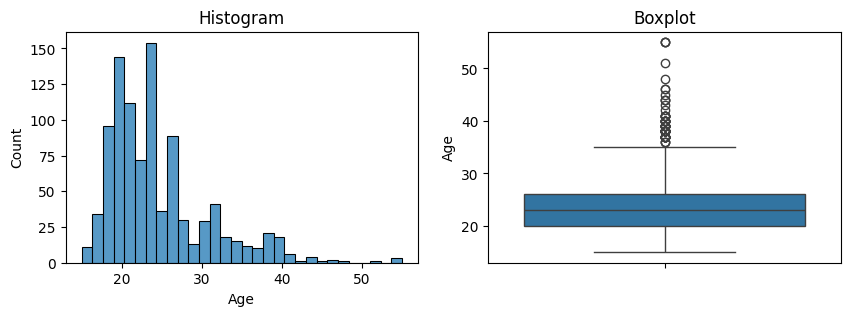

Skewness: 1.4620229864189502
Kurtosis: 2.4692728213970607


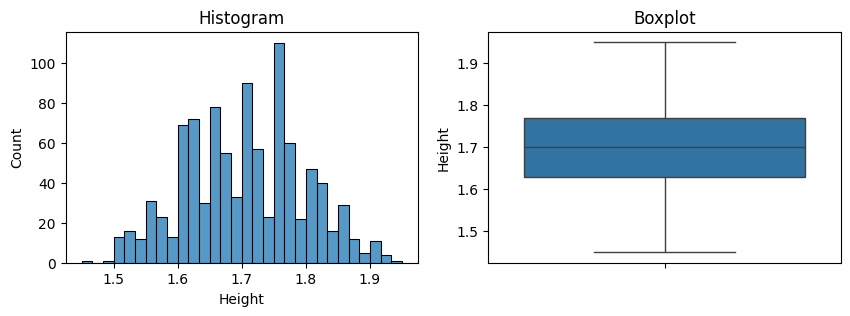

Skewness: 0.012367361241775145
Kurtosis: -0.5339781572897606


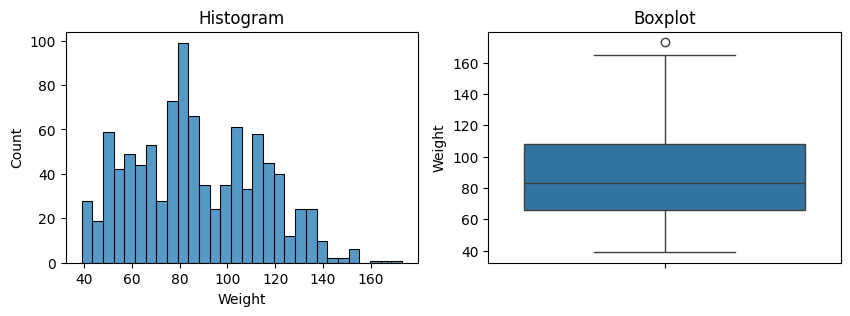

Skewness: 0.26581684716710413
Kurtosis: -0.6810136779162943


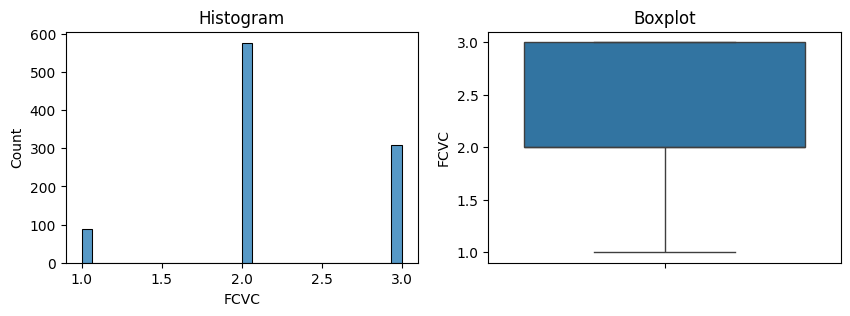

Skewness: -0.1284397722322995
Kurtosis: -0.4755101108639166


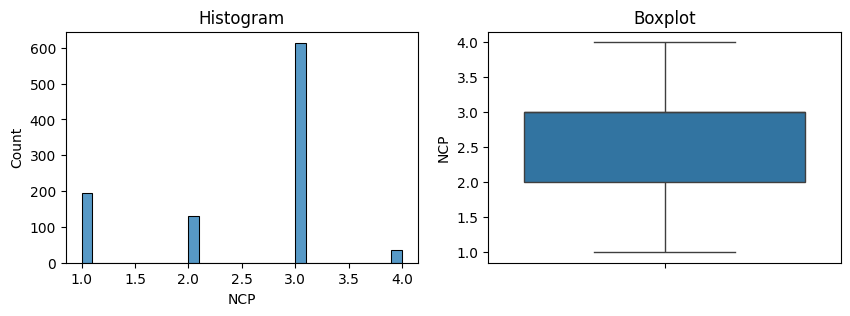

Skewness: -0.8121238170912582
Kurtosis: -0.5984137019780285


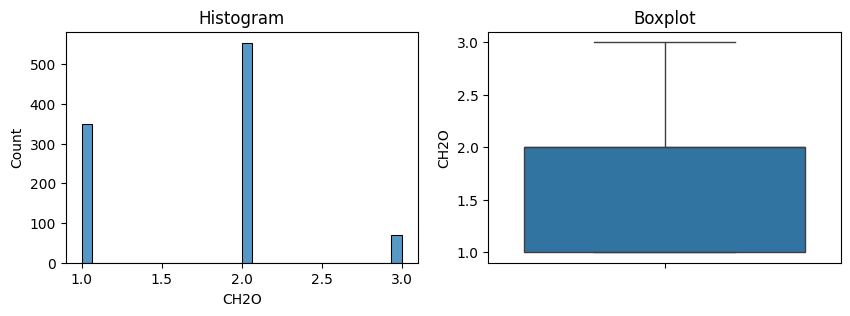

Skewness: 0.17957037019625122
Kurtosis: -0.5772999982224576


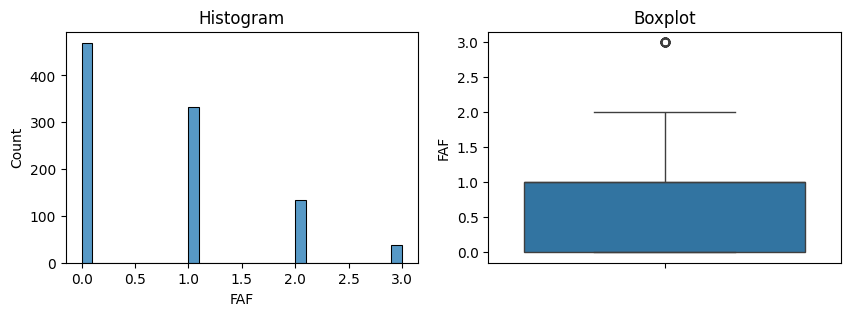

Skewness: 0.9292440494177313
Kurtosis: 0.07684091258855696


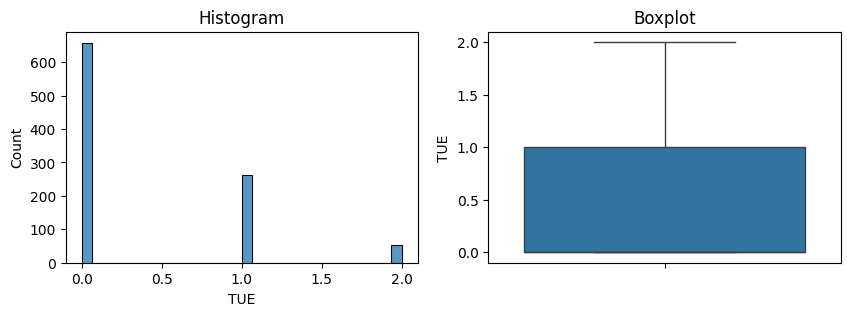

Skewness: 1.291091623717383
Kurtosis: 0.6403237378280133


In [13]:
# Check dist
def check_dist_outliers(df, cols):
    for col in cols:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[col].skew())
        print('Kurtosis:', df[col].kurt())

check_dist_outliers(df, numerical)

untuk visualisasi bar plot kolom kategorikal juga terlihat bahwa ada beberapa kolom yang imbalance seperti family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, dan MTRANS


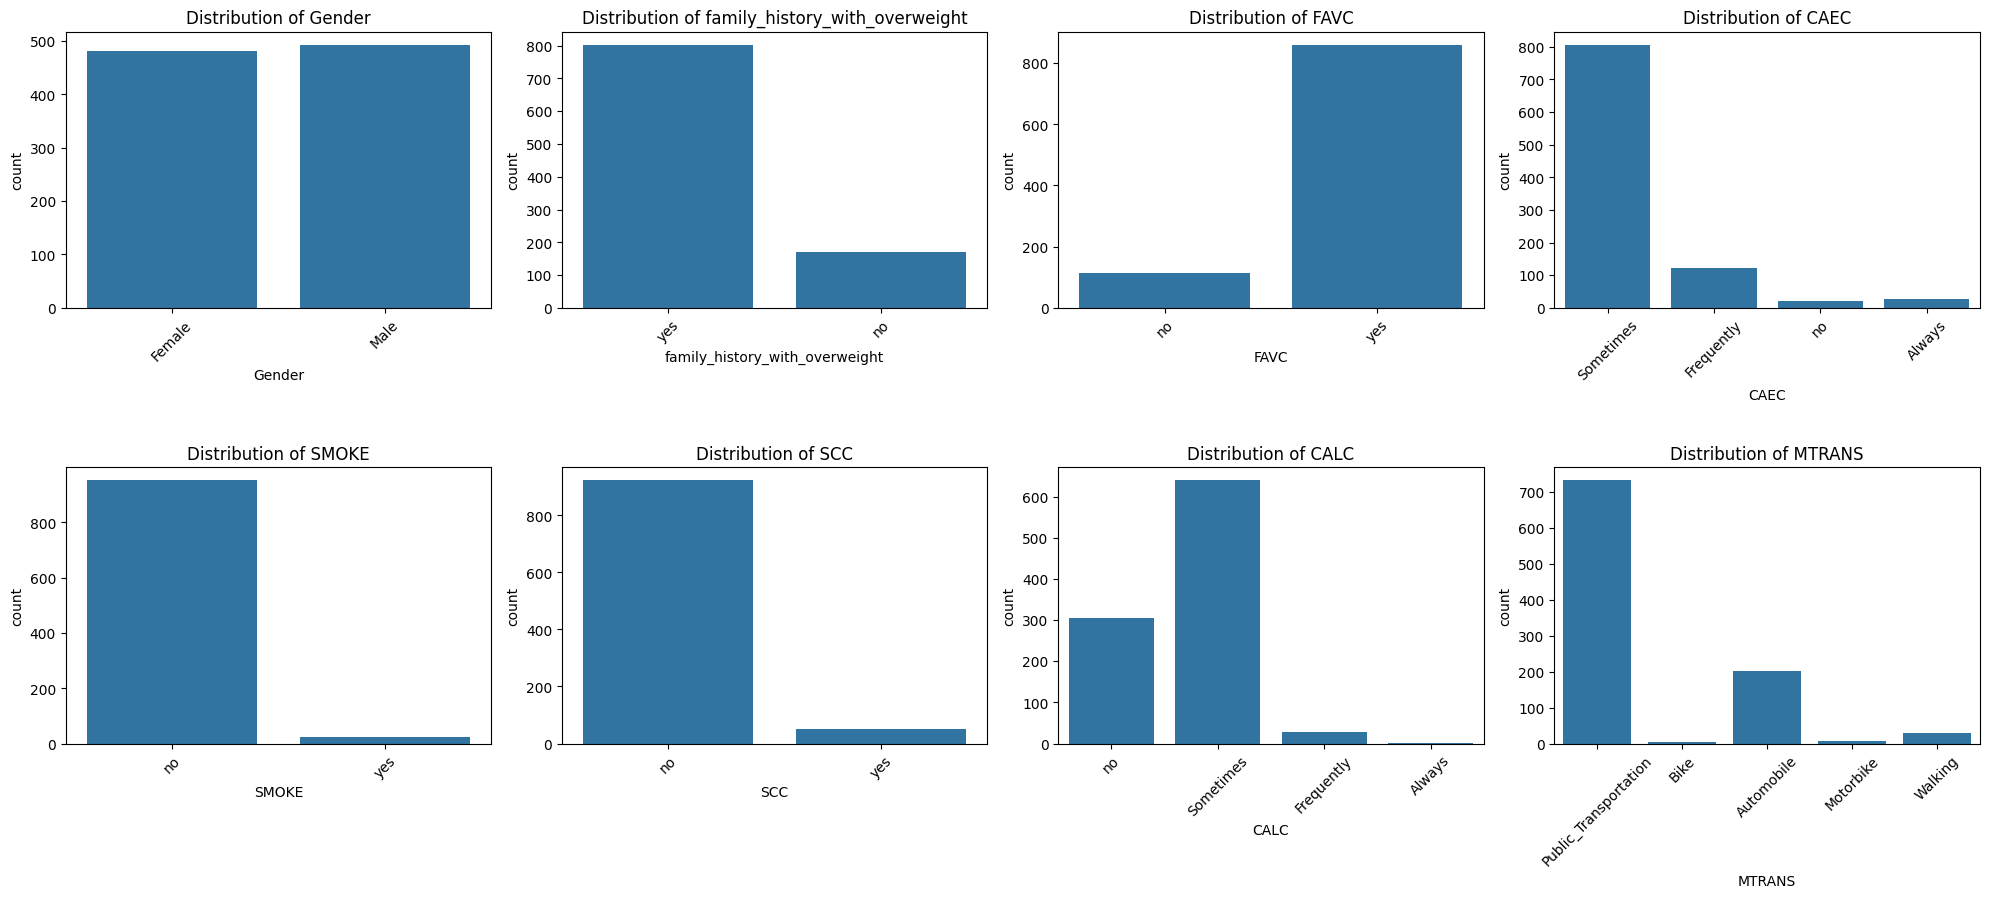

In [14]:
plt.figure(figsize=(20, 12))
idx = 1
for col in categorical:
    if col == 'NObeyesdad':
        continue
    plt.subplot(3, 4, idx)
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    idx += 1
plt.tight_layout()
plt.show()

untuk kolom target sendiri terlhat ada perbedaan jumlah banyak dalam tiap label namun perbedaannya tidak terlalu jauh sehingga masih bisa memberikan insight yang baik dan tidak bias


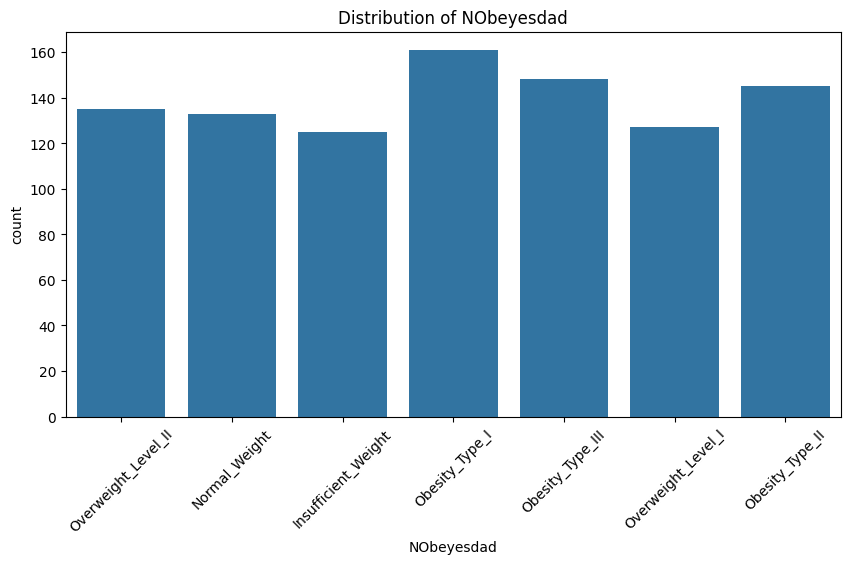

In [15]:
plt.figure(figsize=(10,5))
plt.title("Distribution of NObeyesdad")
sns.countplot(x=df['NObeyesdad'])
plt.xticks(rotation=45)
plt.show()

dari heatmap dibawah terlihat jelas bahwa kolom dengan korelasi tertinggi ada pda weight dan height berarti pertumbuhan berat badan juga berjalan seiringan dengan pertumbuhan tinggi badan


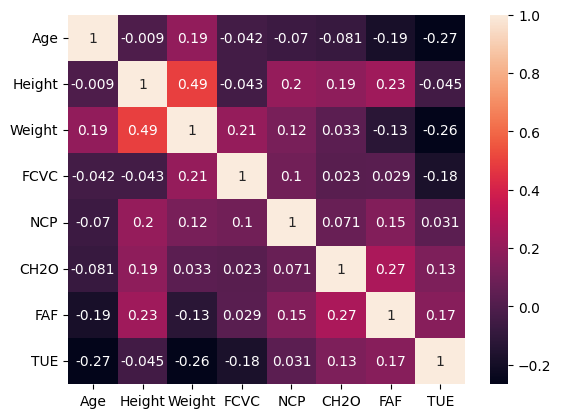

In [16]:
corrplot = df[numerical].corr()
sns.heatmap(corrplot, annot=True)
plt.show()

# Splitting


In [17]:
x = df.drop(columns=['NObeyesdad'], axis = 1)
y = df['NObeyesdad']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,
                                                 random_state = 42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(779, 16) (779,)
(195, 16) (195,)


## Mapping Value for Binary and Ordinal Column


In [19]:
ord_map = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}
ordinal_features = ['CAEC', 'CALC']

for col in ordinal_features:
    x_train[col] = x_train[col].map(ord_map)
    x_test[col] = x_test[col].map(ord_map)

In [20]:
obesity_map = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
y_train = y_train.map(obesity_map)
y_test = y_test.map(obesity_map)

In [21]:
labelen = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC',]
gender_map = {'Male': 1, 'Female': 0}
binary_map = {'yes': 1, 'no': 0}

x_train['Gender'] = x_train['Gender'].map(gender_map)
x_test['Gender'] = x_test['Gender'].map(gender_map)

for col in labelen:
    x_train[col] = x_train[col].map(binary_map)
    x_test[col] = x_test[col].map(binary_map)

# Modeling with Pipeline


In [22]:
hoten = ['MTRANS']

preprocessor = ColumnTransformer(transformers=[
    ('hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), hoten),
    ('scale', RobustScaler(), numerical)
])

In [23]:
pipeline_xgb = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', XGBClassifier(random_state=42, n_estimators = 100))
])
pipeline_xgb.fit(x_train, y_train)
y_pred_xgb = pipeline_xgb.predict(x_test)

In [24]:
pipeline_svm = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', SVC(random_state = 42, kernel='linear'))
])
pipeline_svm.fit(x_train, y_train)
y_pred_svm = pipeline_svm.predict(x_test)

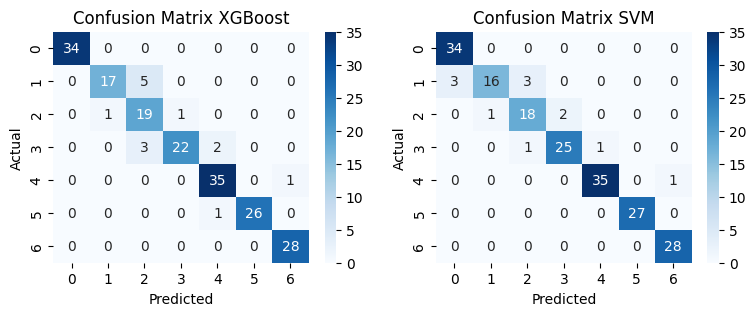

In [25]:
pred = [y_pred_xgb, y_pred_svm]
models = ['XGBoost', 'SVM']

plt.figure(figsize=(14, 3))
for i, (model, preds) in enumerate(zip(models, pred)):
  plt.subplot(1, 3, i+1)
  sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f'Confusion Matrix {model}')
plt.show()

In [26]:
print('XGBoost:')
print(classification_report(y_test, y_pred_xgb))
print('-'*55)
print('SVM:')
print(classification_report(y_test, y_pred_svm))
print('-'*55)

XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.94      0.77      0.85        22
           2       0.70      0.90      0.79        21
           3       0.96      0.81      0.88        27
           4       0.92      0.97      0.95        36
           5       1.00      0.96      0.98        27
           6       0.97      1.00      0.98        28

    accuracy                           0.93       195
   macro avg       0.93      0.92      0.92       195
weighted avg       0.94      0.93      0.93       195

-------------------------------------------------------
SVM:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        34
           1       0.94      0.73      0.82        22
           2       0.82      0.86      0.84        21
           3       0.93      0.93      0.93        27
           4       0.97      0.97      0.97        36
        

Perbandingan Model

- Accuracy: SVM memiliki akurasi keseluruhan sebesar 0.94, yang sedikit lebih tinggi dibandingkan XGBoost (0.93). Ini menunjukkan bahwa SVM lebih sering membuat prediksi yang benar secara keseluruhan pada dataset ini.
- Weighted Average F1-score: SVM Mmncapai 0.94 untuk weighted average F1-score, sedangkan XGBoost adalah 0.93. F1-score adalah rata-rata harmonik dari presisi dan recall, dan weighted average mempertimbangkan jumlah sampel di setiap kelas. Nilai yang lebih tinggi menunjukkan keseimbangan yang lebih baik antara presisi dan recall, terutama untuk kelas yang berbeda ukurannya.
- Weighted Average Precision: SVM memiliki weighted average precision 0.94, sama dengan XGBoost. Ini menunjukkan kedua model memiliki kemampuan yang setara dalam memprediksi kelas positif dengan benar, dengan mempertimbangkan distribusi kelas.
- Weighted Average Recall: SVM mencapai weighted average recall 0.94, sedangkan XGBoost adalah 0.93. Recall mengukur kemampuan model untuk menemukan semua instance positif. Nilai yang lebih tinggi menunjukkan bahwa SVM lebih baik dalam mengidentifikasi semua kasus positif yang relevan, dengan mempertimbangkan distribusi kelas.

Jadi untuk best model adalah SVM


In [27]:
with open('pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline_svm, file)